# Heart Stroke Analysis


In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Visualizing

In [164]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [165]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [166]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [167]:
data.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [168]:
data.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [169]:
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


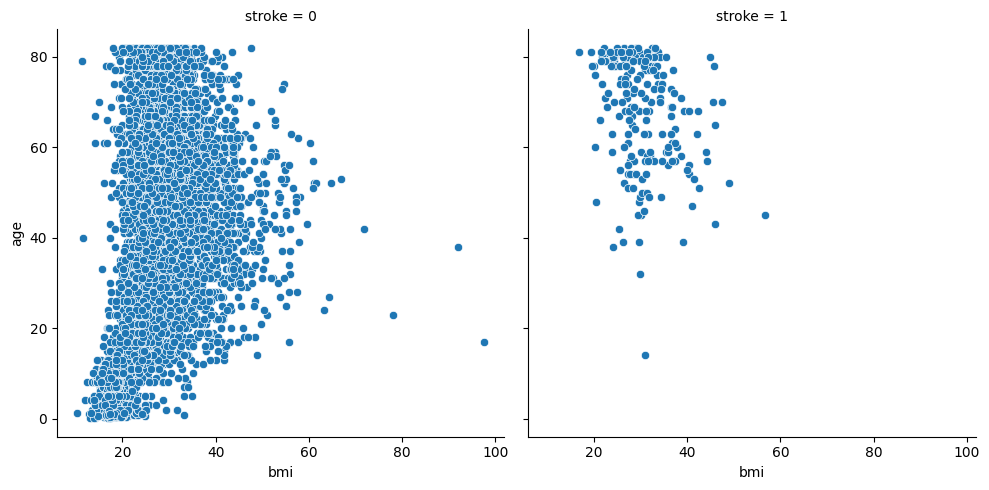

In [170]:
a = sns.relplot(data=data, x="bmi", y="age", col="stroke")

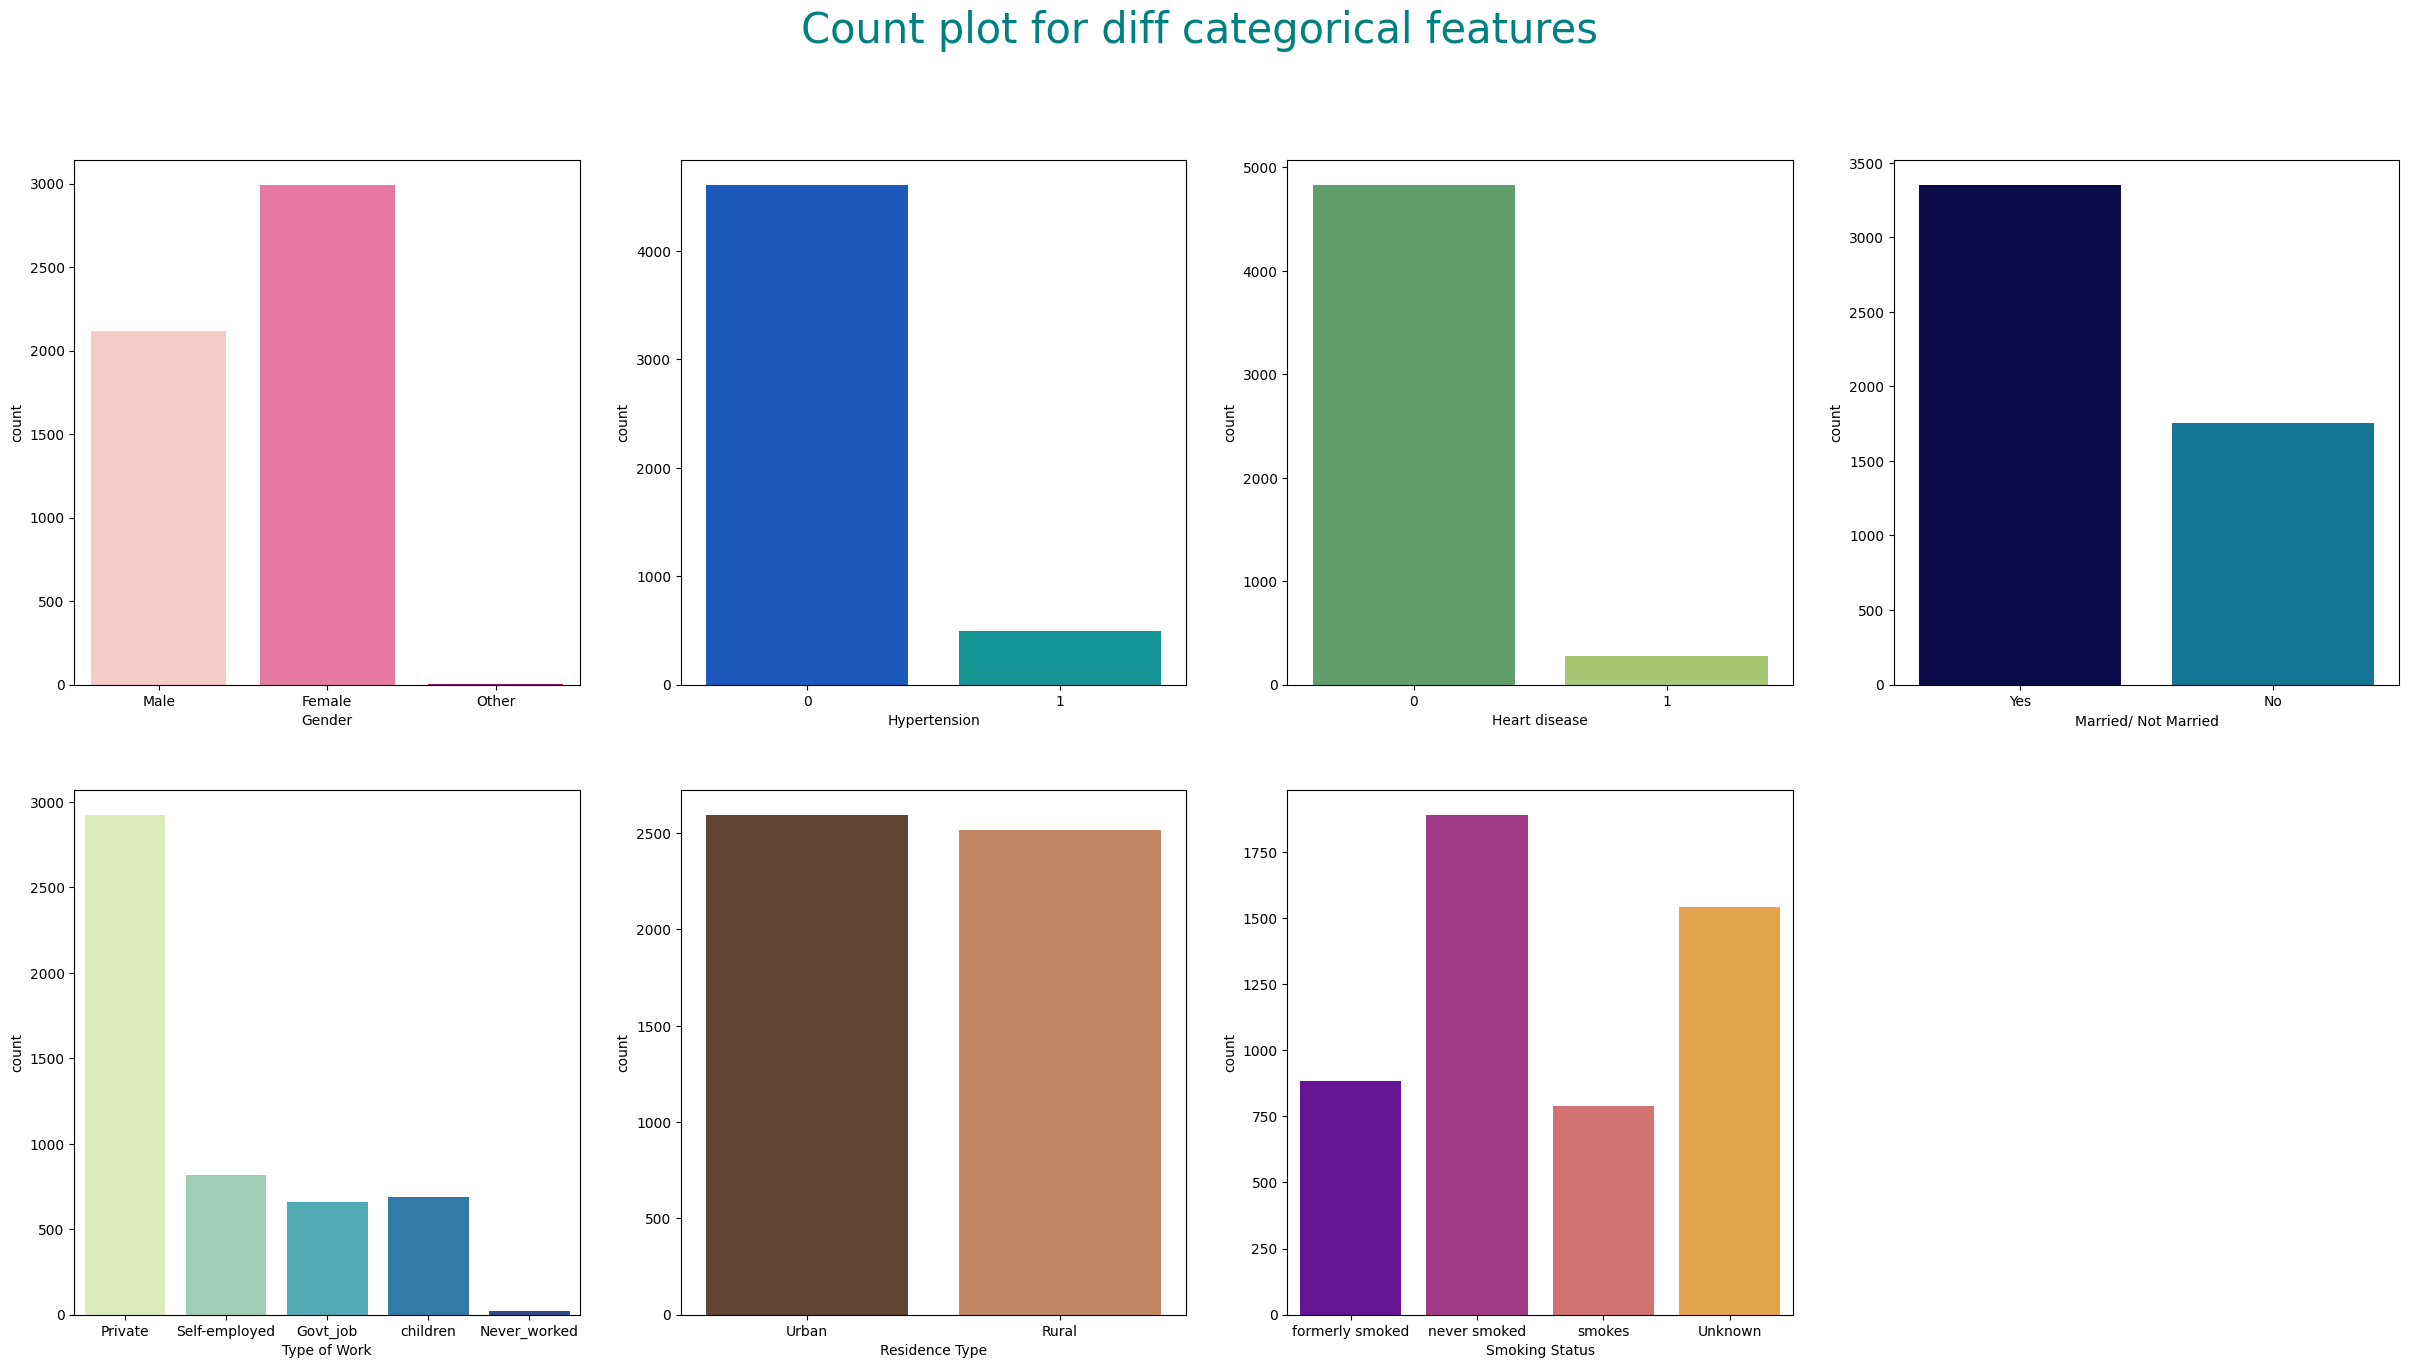

In [171]:
fig, ax = plt.subplots(2, 4, figsize = (30, 15))
ax[1, 3].axis('off')

plt.suptitle('Count plot for diff categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='gender', data= data, ax= ax[0, 0], palette= 'RdPu')
ax1.set(xlabel = 'Gender')

ax2 = sns.countplot(x ='hypertension', data= data, ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Hypertension')

ax3 = sns.countplot(x ='heart_disease', data= data, ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Heart disease')

ax4 = sns.countplot(x ='ever_married', data= data, ax= ax[0, 3], palette= 'ocean')
ax4.set(xlabel = 'Married/ Not Married')

ax5 = sns.countplot(x ='work_type', data= data, ax= ax[1, 0], palette= 'YlGnBu')
ax5.set(xlabel = 'Type of Work')

ax6 = sns.countplot(x ='Residence_type', data= data, ax= ax[1, 1], palette= 'copper')
ax6.set(xlabel = 'Residence Type')

ax7 = sns.countplot(x ='smoking_status', data= data, ax= ax[1, 2], palette= 'plasma')
ax7.set(xlabel = 'Smoking Status')

plt.show()

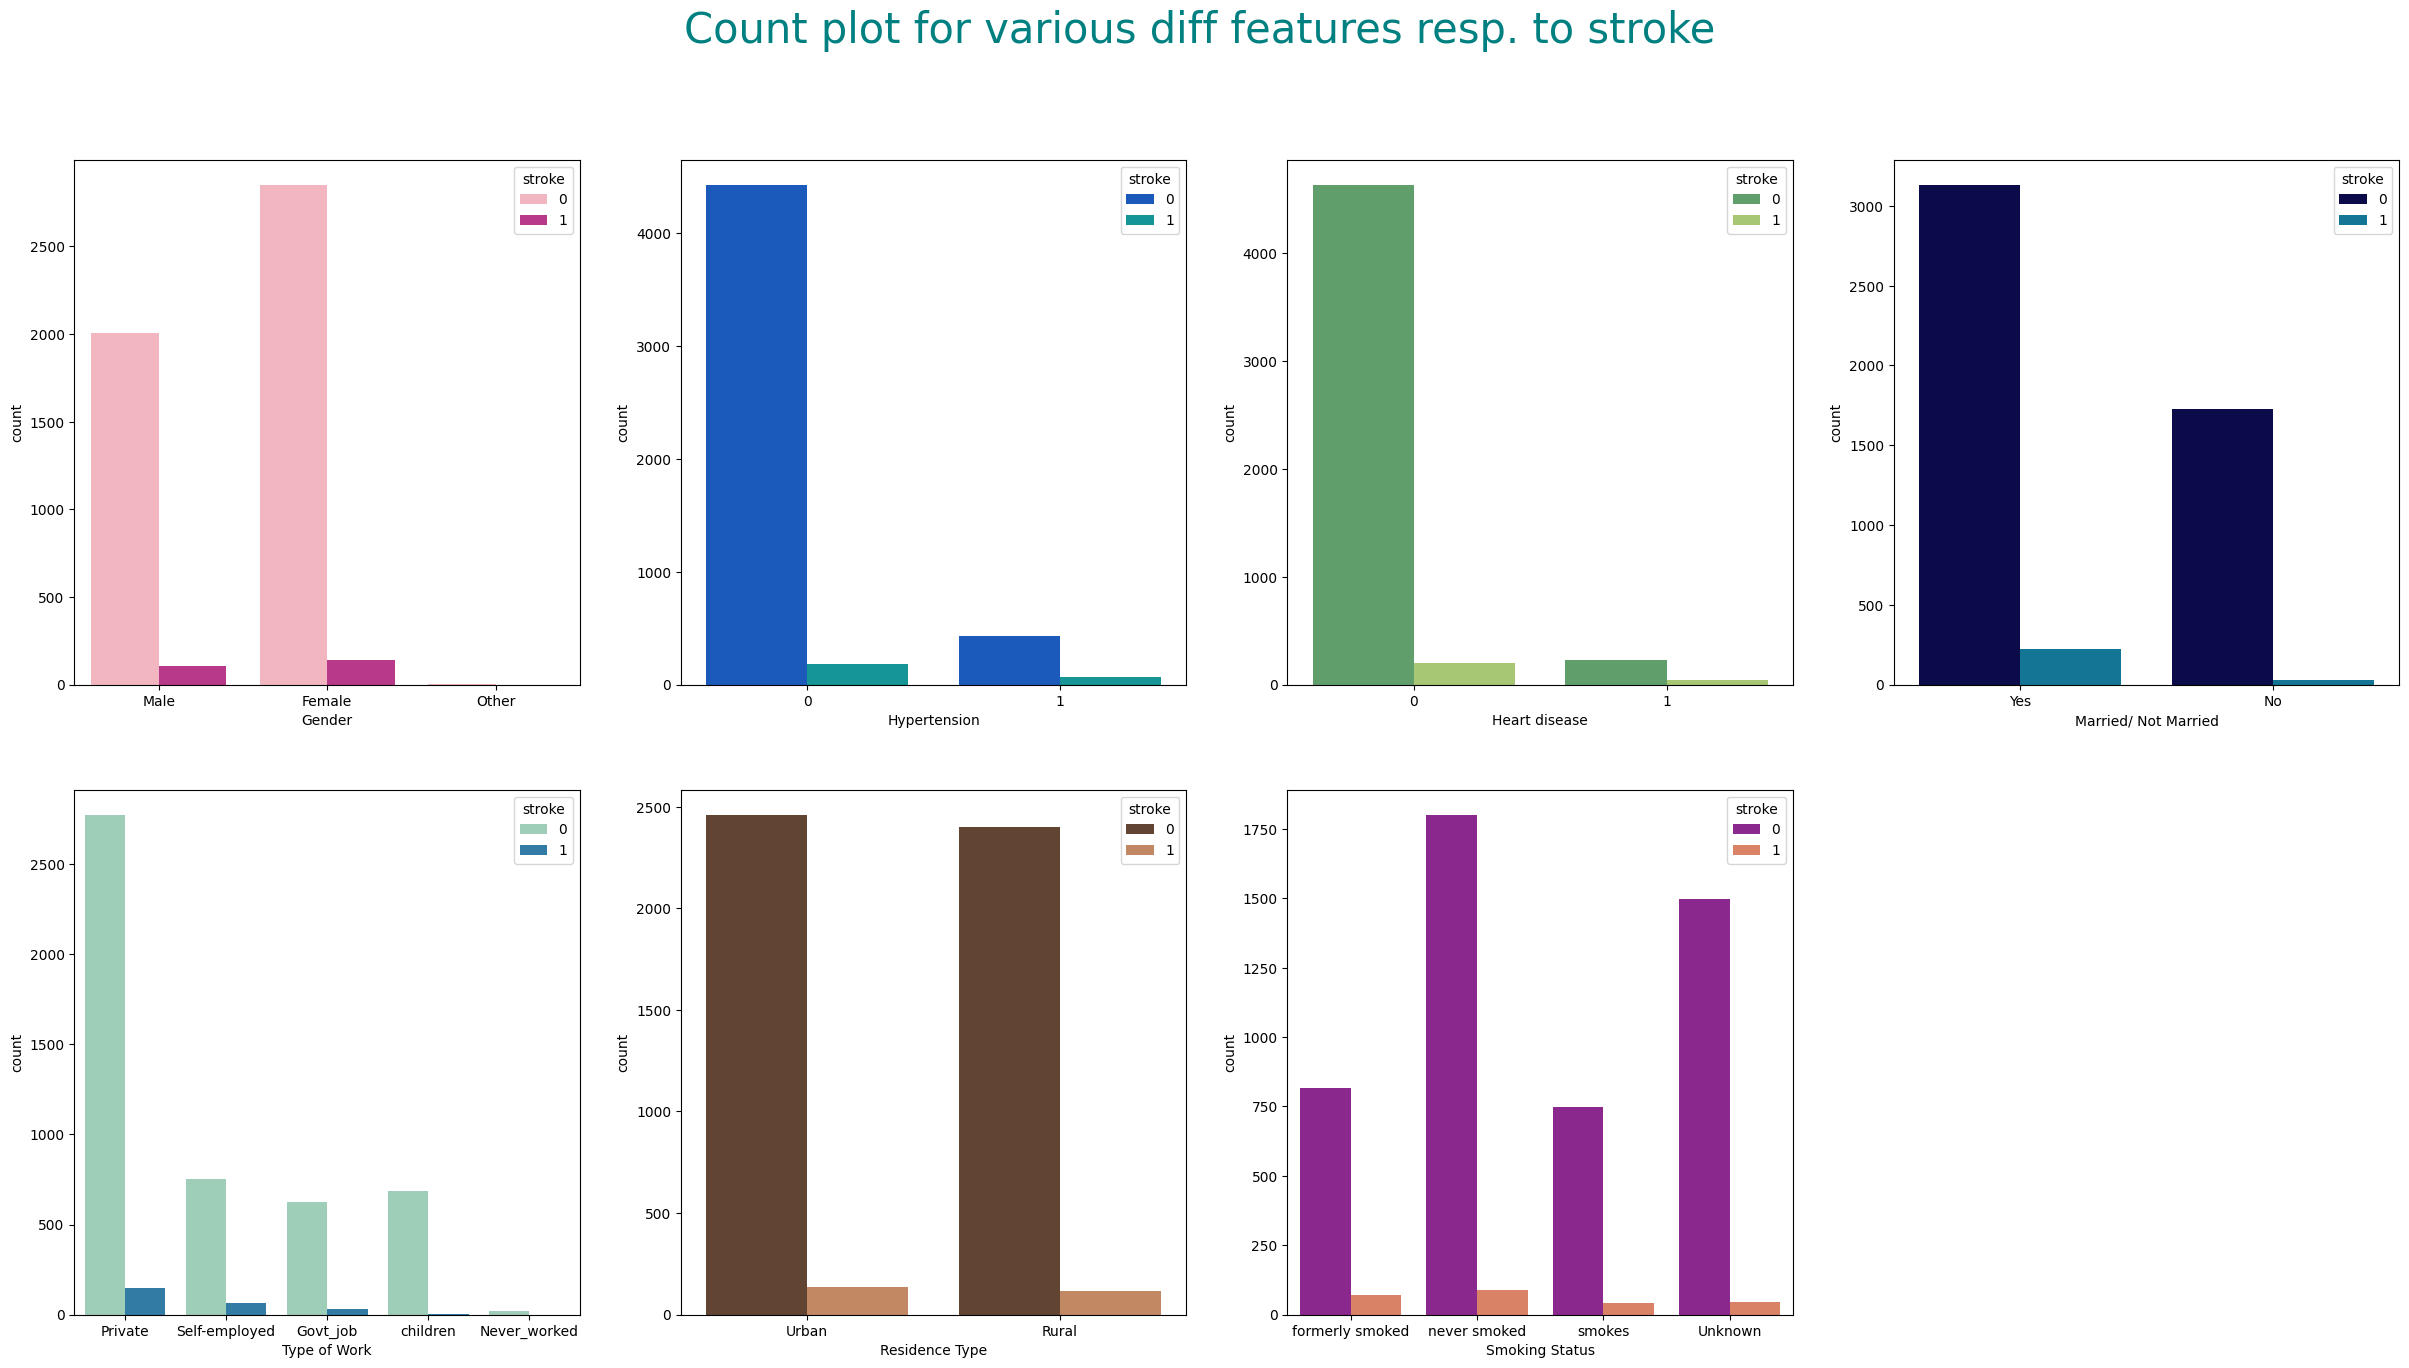

In [172]:
fig, ax = plt.subplots(2, 4, figsize = (30, 15))
ax[1, 3].axis('off')

plt.suptitle('Count plot for various diff features resp. to stroke', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='gender', data= data, ax= ax[0, 0], palette= 'RdPu', hue="stroke")
ax1.set(xlabel = 'Gender')

ax2 = sns.countplot(x ='hypertension', data= data, ax= ax[0, 1], palette= 'winter', hue="stroke")
ax2.set(xlabel = 'Hypertension')

ax3 = sns.countplot(x ='heart_disease', data= data, ax= ax[0, 2], palette= 'summer', hue="stroke")
ax3.set(xlabel = 'Heart disease')

ax4 = sns.countplot(x ='ever_married', data= data, ax= ax[0, 3], palette= 'ocean', hue="stroke")
ax4.set(xlabel = 'Married/ Not Married')

ax5 = sns.countplot(x ='work_type', data= data, ax= ax[1, 0], palette= 'YlGnBu', hue="stroke")
ax5.set(xlabel = 'Type of Work')

ax6 = sns.countplot(x ='Residence_type', data= data, ax= ax[1, 1], palette= 'copper', hue="stroke")
ax6.set(xlabel = 'Residence Type')

ax7 = sns.countplot(x ='smoking_status', data= data, ax= ax[1, 2], palette= 'plasma', hue="stroke")
ax7.set(xlabel = 'Smoking Status')

plt.show()

### Outliers analysis

In [173]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Age -> very low min value\
avg glucose -> high extreme value\
bmi -> extreme max value of 97. 

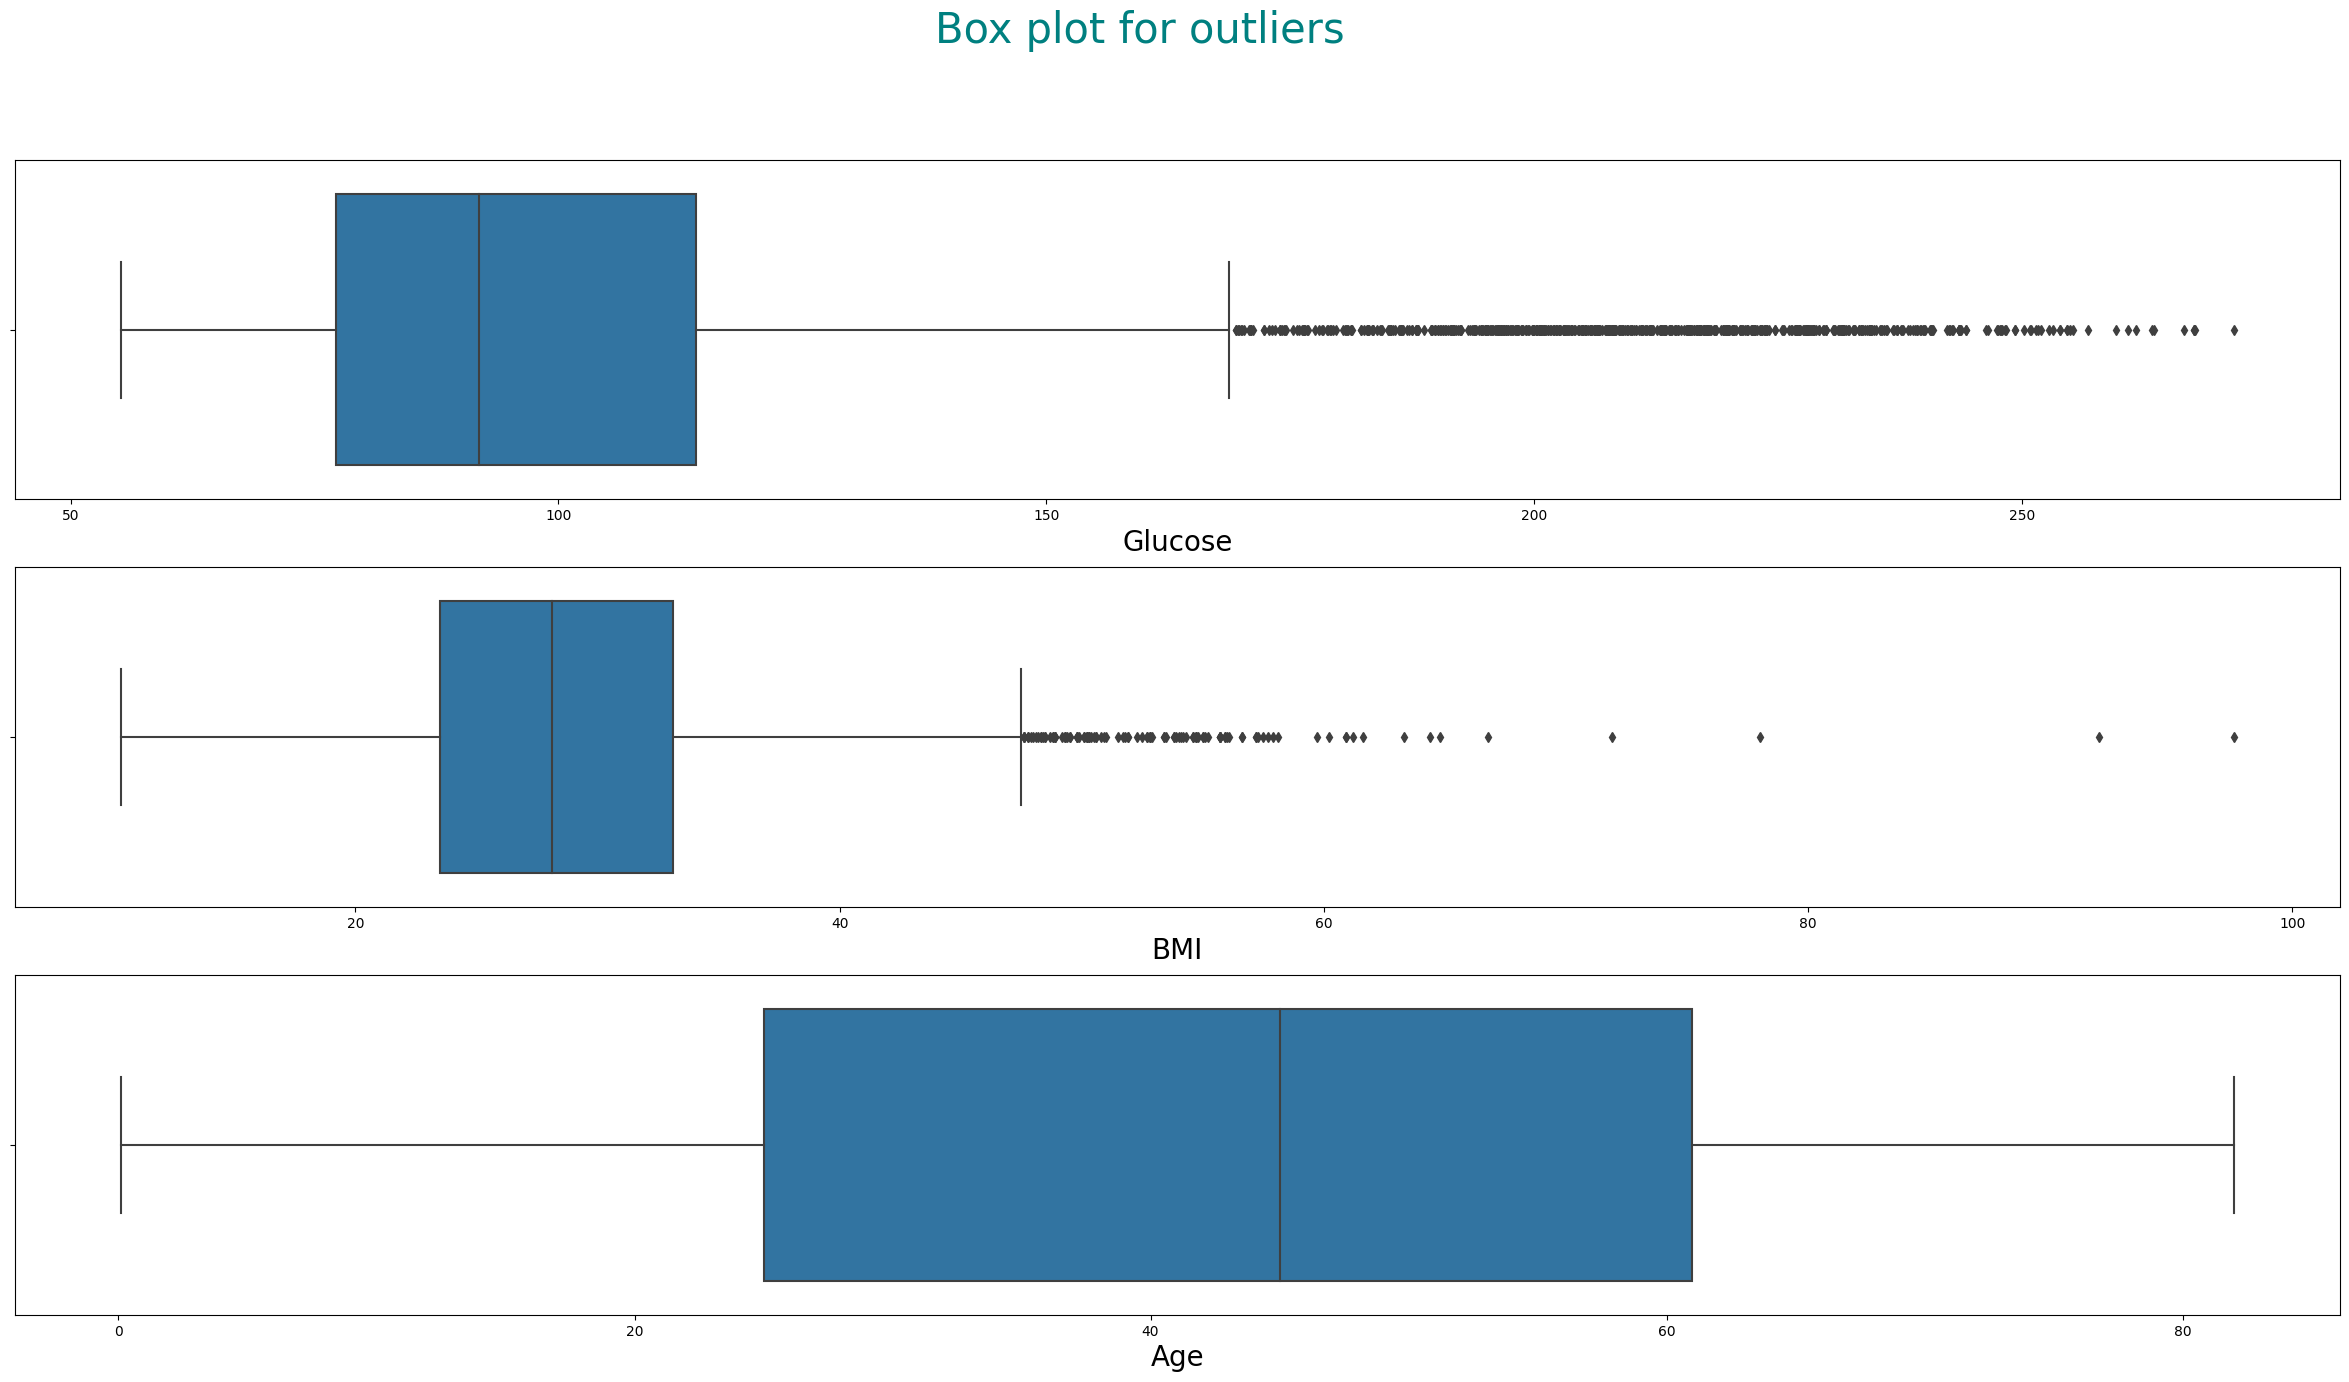

In [174]:
fig, ax = plt.subplots(3, 1, figsize = (30, 15))
# ax[1, 3].axis('off')

plt.suptitle('Box plot for outliers', fontsize = 30, color= 'teal')

ax1 = sns.boxplot(x ='avg_glucose_level', data= data, ax= ax[0])
ax1.set_xlabel(xlabel = 'Glucose',fontsize=20)
#ax1.set_xticklabels(fontsize=20)

ax2 = sns.boxplot(x ='bmi', data= data, ax= ax[1])
ax2.set_xlabel(xlabel = 'BMI',fontsize=20)

ax3 = sns.boxplot(x ='age', data= data, ax= ax[2])
ax3.set_xlabel(xlabel = 'Age',fontsize=20)


plt.show()

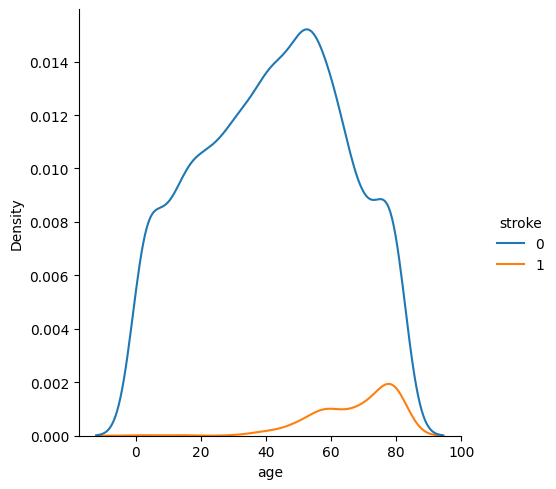

In [175]:
a = sns.displot(data=data, x="age", kind="kde", hue='stroke')

we can see quite a number of patients are babies. Also, it's observed that barely any strokes suffered at younger ages.

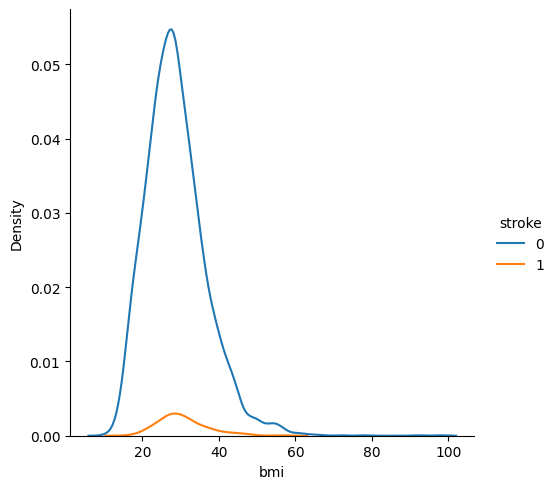

In [176]:
a = sns.displot(data=data, x="bmi", kind="kde", hue="stroke")

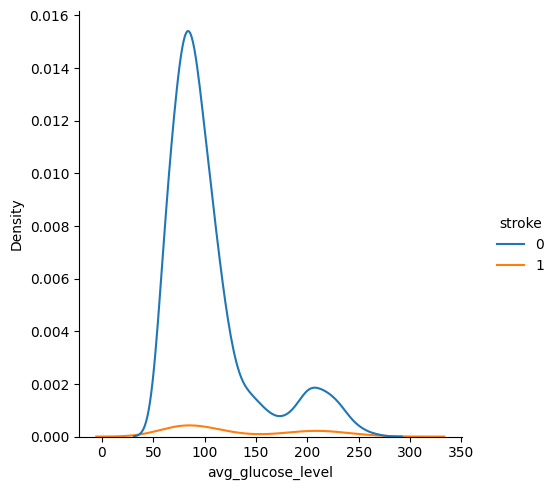

In [177]:
a = sns.displot(data=data, x="avg_glucose_level", kind="kde", hue="stroke")

## Data Preprocessing

### Removing outliers

In [178]:
# Age
q = data['age'].quantile(0.10)
dataf = data[data['age']>q]
# dataf[dataf['stroke']==1]
dataf.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4380.000000,4567.000000
mean,36618.848040,47.760893,0.109043,0.060215,107.690891,30.079589,0.054303
std,21180.055031,19.424319,0.311727,0.237910,46.885868,7.375705,0.226639
min,67.000000,12.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,17950.500000,32.000000,0.000000,0.000000,77.420000,25.000000,0.000000
50%,37090.000000,49.000000,0.000000,0.000000,92.160000,28.900000,0.000000
75%,54800.000000,63.000000,0.000000,0.000000,115.810000,33.800000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [179]:
# avg_glucose_level
q = dataf['avg_glucose_level'].quantile(0.90)
dataf = dataf[dataf['avg_glucose_level']<q]
dataf.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,3968.000000,4110.000000
mean,36785.779805,46.167397,0.093187,0.047689,95.134959,29.678604,0.045985
std,21208.918148,19.257480,0.290730,0.213132,28.968163,7.196413,0.209479
min,67.000000,12.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,18116.000000,31.000000,0.000000,0.000000,75.537500,24.700000,0.000000
50%,37438.500000,46.000000,0.000000,0.000000,89.015000,28.600000,0.000000
75%,55161.750000,61.000000,0.000000,0.000000,106.540000,33.200000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,197.540000,97.600000,1.000000


##### Replacing bmi NA values with median of bmi

In [180]:
dataf[dataf["bmi"].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
43,1845,Female,63.0,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,37937,Female,75.0,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,18587,Female,76.0,0,0,No,Private,Urban,89.96,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [181]:
droppednas = dataf
droppednas["bmi"].dropna(inplace=True)
droppednas["bmi"].median()

28.6

In [182]:
fillednas = dataf
fillednas["bmi"].fillna(droppednas["bmi"].median(), inplace=True)
fillednas


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.6,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [183]:
fillednas[fillednas["bmi"] == 28.6].count()

id                   166
gender               166
age                  166
hypertension         166
heart_disease        166
ever_married         166
work_type            166
Residence_type       166
avg_glucose_level    166
bmi                  166
smoking_status       166
stroke               166
dtype: int64

In [184]:
fillednas[fillednas["bmi"] == 28.6].sum()


id                                                             4040955
gender               FemaleMaleFemaleFemaleFemaleMaleFemaleMaleFema...
age                                                             8720.0
hypertension                                                        38
heart_disease                                                       21
ever_married         YesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYes...
work_type            PrivatePrivatePrivateSelf-employedPrivatePriva...
Residence_type       RuralRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralU...
avg_glucose_level                                              16430.8
bmi                                                             4747.6
smoking_status       UnknownUnknownformerly smokedUnknownUnknownfor...
stroke                                                              31
dtype: object

In [185]:
fillednas.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000
mean,36785.779805,46.167397,0.093187,0.047689,95.134959,29.641338,0.045985
std,21208.918148,19.257480,0.290730,0.213132,28.968163,7.073716,0.209479
min,67.000000,12.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,18116.000000,31.000000,0.000000,0.000000,75.537500,24.800000,0.000000
50%,37438.500000,46.000000,0.000000,0.000000,89.015000,28.600000,0.000000
75%,55161.750000,61.000000,0.000000,0.000000,106.540000,33.000000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,197.540000,97.600000,1.000000


In [186]:
fillednas['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [187]:
fillednas.groupby('stroke').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36781.637592,45.144351,0.085692,0.043611,94.678972,29.661158
1,36871.714286,67.391534,0.248677,0.132275,104.594868,29.230159


From the above groupby(), we can infer that the patients who had a stroke
- were considerably older
- had around 3.25 times the hypertension.
- had a considerably higher glucose level.


In [188]:
fillednas.groupby('smoking_status').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,
Unknown,36497.188285,41.824268,0.042887,0.031381,94.626977,28.848431,0.036611
formerly smoked,37036.288948,53.436751,0.111851,0.070573,94.540120,30.185353,0.073236
never smoked,36853.032980,45.481743,0.106596,0.040047,95.866508,29.626090,0.040047
smokes,36748.283688,45.964539,0.109220,0.063830,94.695504,30.173759,0.043972


From the above groupby(), we can infer that the patients who smoke 
- have an average hypertension around the same of those who don't smoke.
- have only a slightly higher glucose level than those who don't.
- have almost twice the chance of having heart disease than those who don't.
- nothing can be inferred about the bmi.
- finally, probablilty of having a stroke is almost twice if they have fomerly smoked, and 1.12 times if they are currently smoke (this could be low as age plays a role here).


In [189]:
fillednas.groupby('ever_married').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
ever_married,,,,,,,
No,36340.349614,28.783205,0.039417,0.019709,93.083488,27.817995,0.020566
Yes,36962.408087,53.060822,0.114509,0.058784,95.948437,30.364356,0.056065


From the above groupby(), we can infer that the patients are married
- are at least 4 times higher in hypertension.
- are 4 times more likely to having heart disease.
- have a higher glucose level.
- around 4 times more likely to have a stroke.
Obviously, these inferences are not only because of the status of marriage as the age discrepancy also heavily contributes to this.

In [190]:
fillednas['ever_married'].replace({'No':0, 'Yes':1}, inplace=True)
fillednas

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,1,Private,Rural,70.09,27.4,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,Urban,83.75,28.6,never smoked,0
5106,44873,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [191]:
from sklearn.model_selection import train_test_split

In [192]:
fillednas.describe()


,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
count,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000
mean,36785.779805,46.167397,0.093187,0.047689,0.716058,95.134959,29.641338,0.045985
std,21208.918148,19.257480,0.290730,0.213132,0.450964,28.968163,7.073716,0.209479
min,67.000000,12.000000,0.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,18116.000000,31.000000,0.000000,0.000000,0.000000,75.537500,24.800000,0.000000
50%,37438.500000,46.000000,0.000000,0.000000,1.000000,89.015000,28.600000,0.000000
75%,55161.750000,61.000000,0.000000,0.000000,1.000000,106.540000,33.000000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,1.000000,197.540000,97.600000,1.000000


In [193]:
labeldata = fillednas
labeldata.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,1,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,0,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,1,Private,Rural,76.15,28.6,Unknown,1
9,60491,Female,78.0,0,0,1,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,1,Private,Rural,80.43,29.7,never smoked,1
11,12095,Female,61.0,0,1,1,Govt_job,Rural,120.46,36.8,smokes,1


In [194]:
le=LabelEncoder()
labeldata["gender"]=le.fit_transform(labeldata["gender"])
labeldata["ever_married"]=le.fit_transform(labeldata["ever_married"])
labeldata["work_type"]=le.fit_transform(labeldata["work_type"])
labeldata["Residence_type"]=le.fit_transform(labeldata["Residence_type"])
labeldata["smoking_status"]=le.fit_transform(labeldata["smoking_status"])
labeldata.head(20)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.8,2,1
8,27419,0,59.0,0,0,1,2,0,76.15,28.6,0,1
9,60491,0,78.0,0,0,1,2,1,58.57,24.2,0,1
10,12109,0,81.0,1,0,1,2,0,80.43,29.7,2,1
11,12095,0,61.0,0,1,1,0,0,120.46,36.8,3,1


Key for the above labelling is:\
hypertension, heart_disease, ever_married, stroke -> 0: No, 1: Yes \
work_type -> 0: govt_job, 1: children, 2: private, 3: self_employed \
residence_type -> 0: rural, 1: urban \
smoking_status -> 0: unknown, 1: formerly smokes, 2: never smoked, 3: smokes


# Slicing Data

In [198]:
X = labeldata.drop(columns="stroke") #all columns except the last one
y = labeldata["stroke"] 

# The Model

In [199]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.6)
X_sampled, y_sampled = oversample.fit_resample(X,y)

Splitting the dataset into the Training set and Testing set

In [200]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size = 0.2, random_state = 0)

Logistic Regression

In [201]:

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [202]:
# Predicting the result
y_pred=lr.predict(X_test)

These are the predicted stroke values. Since it's a binary array, we now compare it with the original stroke attribute values.

### Model Stats

In [203]:
# Model Stats
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac = accuracy_score(y_test,y_pred)*100
print("accuracy score: ",ac)

cm = confusion_matrix(y_test,y_pred)
print("\nconfusion matrix: \n", cm)

cr= classification_report(y_test,y_pred)
print("\nclassification report: \n", cr)

accuracy score:  70.59760956175299

confusion matrix: 
 [[606 166]
 [203 280]]

classification report: 
               precision    recall  f1-score   support

           0       0.75      0.78      0.77       772
           1       0.63      0.58      0.60       483

    accuracy                           0.71      1255
   macro avg       0.69      0.68      0.68      1255
weighted avg       0.70      0.71      0.70      1255

